<a href="https://colab.research.google.com/github/lexoz-bedra/cs102/blob/homework06/part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч 
случайных строк из датасета
(**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
# читаем датасет и берём 20000 рандомных строк
genres = pd.read_csv("/content/drive/MyDrive/music_genre.csv")
genres_rnd = genres.sample(n=20000, random_state=19)
genres_rnd

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
3653,44110.0,Pendulum,Blood Sugar - Original Mix,53.0,0.000139,0.366,315733.0,0.97000,0.808000,G#,0.1680,-5.109,Major,0.1270,176.00400000000002,4-Apr,0.1700,Electronic
14031,51469.0,"Harry Connick, Jr.",The Way You Look Tonight,33.0,0.547000,0.457,225573.0,0.23000,0.000000,C#,0.2660,-13.699,Major,0.0377,130.102,4-Apr,0.5210,Jazz
5515,82487.0,Nobuo Uematsu,"Primal Judgment (From ""Final Fantasy XIV"")",29.0,0.377000,0.308,310893.0,0.73200,0.904000,F,0.1760,-8.069,Major,0.0469,75.195,4-Apr,0.2410,Anime
2905,31349.0,The Chemical Brothers,Do It Again,50.0,0.022400,0.867,332973.0,0.71400,0.704000,E,0.1040,-5.144,Major,0.0662,123.97399999999999,4-Apr,0.6230,Electronic
26451,71898.0,Dave East,Phone Jumpin,60.0,0.021600,0.632,247227.0,0.76700,0.000000,A,0.3780,-4.002,Minor,0.2320,140.14,4-Apr,0.6220,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23569,43039.0,Wayne Hancock,Thunderstorms and Neon Signs,37.0,0.618000,0.603,222467.0,0.29300,0.000001,E,0.1090,-12.984,Major,0.0312,135.16899999999998,4-Apr,0.5560,Country
44768,36771.0,Elena Kats-Chernin,Lullaby For Nick,49.0,0.989000,0.388,-1.0,0.00484,0.881000,A,0.0588,-32.450,Minor,0.0416,?,3-Apr,0.0689,Classical
9792,24634.0,いとうかなこ,はじまりの歌,19.0,0.017800,0.413,276587.0,0.58700,0.016000,A#,0.0786,-8.292,Major,0.0351,95.95299999999999,4-Apr,0.2520,Anime
6770,51220.0,empty_field,vivi,32.0,0.001400,0.553,270733.0,0.93700,0.000002,B,0.1630,-4.227,Major,0.0790,119.98100000000001,4-Apr,0.8040,Anime


In [ ]:
# убираем дублирующиеся строки
genres_unique = genres_rnd.drop_duplicates()
genres_unique

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
3653,44110.0,Pendulum,Blood Sugar - Original Mix,53.0,0.000139,0.366,315733.0,0.97000,0.808000,G#,0.1680,-5.109,Major,0.1270,176.00400000000002,4-Apr,0.1700,Electronic
14031,51469.0,"Harry Connick, Jr.",The Way You Look Tonight,33.0,0.547000,0.457,225573.0,0.23000,0.000000,C#,0.2660,-13.699,Major,0.0377,130.102,4-Apr,0.5210,Jazz
5515,82487.0,Nobuo Uematsu,"Primal Judgment (From ""Final Fantasy XIV"")",29.0,0.377000,0.308,310893.0,0.73200,0.904000,F,0.1760,-8.069,Major,0.0469,75.195,4-Apr,0.2410,Anime
2905,31349.0,The Chemical Brothers,Do It Again,50.0,0.022400,0.867,332973.0,0.71400,0.704000,E,0.1040,-5.144,Major,0.0662,123.97399999999999,4-Apr,0.6230,Electronic
26451,71898.0,Dave East,Phone Jumpin,60.0,0.021600,0.632,247227.0,0.76700,0.000000,A,0.3780,-4.002,Minor,0.2320,140.14,4-Apr,0.6220,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23569,43039.0,Wayne Hancock,Thunderstorms and Neon Signs,37.0,0.618000,0.603,222467.0,0.29300,0.000001,E,0.1090,-12.984,Major,0.0312,135.16899999999998,4-Apr,0.5560,Country
44768,36771.0,Elena Kats-Chernin,Lullaby For Nick,49.0,0.989000,0.388,-1.0,0.00484,0.881000,A,0.0588,-32.450,Minor,0.0416,?,3-Apr,0.0689,Classical
9792,24634.0,いとうかなこ,はじまりの歌,19.0,0.017800,0.413,276587.0,0.58700,0.016000,A#,0.0786,-8.292,Major,0.0351,95.95299999999999,4-Apr,0.2520,Anime
6770,51220.0,empty_field,vivi,32.0,0.001400,0.553,270733.0,0.93700,0.000002,B,0.1630,-4.227,Major,0.0790,119.98100000000001,4-Apr,0.8040,Anime


In [ ]:
# считаем и выводим строки с пустым исполнителем
genres_empty = genres_unique.loc[genres_unique["artist_name"] == "empty_field"]
print(f'Количество строк с пустым значением имени исполнителя: {len(genres_empty)}')
genres_empty

Количество строк с пустым значением имени исполнителя: 1000


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
46785,45185.0,empty_field,Venom,62.0,0.218000,0.795,123298.0,0.6280,0.000000,D,0.1640,-7.686,Major,0.3080,147.96,4-Apr,0.5340,Hip-Hop
49844,33025.0,empty_field,Speak Up,49.0,0.237000,0.814,185312.0,0.4340,0.000000,D,0.1120,-9.367,Major,0.2280,160.015,4-Apr,0.3900,Hip-Hop
8894,88352.0,empty_field,Fight With Seymour,39.0,0.000111,0.558,346840.0,0.7980,0.520000,G,0.1590,-5.443,Major,0.0352,135.012,4-Apr,0.6260,Anime
7604,52610.0,empty_field,HOPE,25.0,0.666000,0.662,268201.0,0.7100,0.000000,G,0.1760,-5.272,Major,0.0299,115.92299999999999,4-Apr,0.4340,Anime
39364,49723.0,empty_field,Hit Me With Your Best Shot,65.0,0.117000,0.741,171267.0,0.5800,0.000033,E,0.2120,-9.050,Major,0.0304,127.402,4-Apr,0.9440,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42319,84474.0,empty_field,"West Side Story: Act II: One Hand, One Heart",41.0,0.934000,0.185,182773.0,0.0805,0.012500,F#,0.0841,-21.025,Major,0.0428,89.936,3-Apr,0.0574,Classical
41618,41319.0,empty_field,"The Nutcracker, Op. 71: Act I Tableau 1: March",29.0,0.959000,0.569,151400.0,0.1240,0.935000,E,0.0785,-24.487,Minor,0.0399,143.498,4-Apr,0.4960,Classical
45662,90369.0,empty_field,Roses,65.0,0.342000,0.782,173611.0,0.5000,0.000021,F,0.1330,-6.473,Minor,0.0611,102.001,4-Apr,0.2810,Hip-Hop
5385,40559.0,empty_field,恋と吟(うた),34.0,0.011900,0.528,293653.0,0.4850,0.000001,G,0.4720,-4.818,Major,0.0348,107.99,3-Apr,0.4650,Anime


In [ ]:
# удаляем строки с пустым исполнителем
indexes_to_drop = genres_unique.loc[genres_unique["artist_name"] == "empty_field"].index
genres_full = genres_unique.drop(index=indexes_to_drop)

genres_full

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
3653,44110.0,Pendulum,Blood Sugar - Original Mix,53.0,0.000139,0.366,315733.0,0.97000,0.808000,G#,0.1680,-5.109,Major,0.1270,176.00400000000002,4-Apr,0.1700,Electronic
14031,51469.0,"Harry Connick, Jr.",The Way You Look Tonight,33.0,0.547000,0.457,225573.0,0.23000,0.000000,C#,0.2660,-13.699,Major,0.0377,130.102,4-Apr,0.5210,Jazz
5515,82487.0,Nobuo Uematsu,"Primal Judgment (From ""Final Fantasy XIV"")",29.0,0.377000,0.308,310893.0,0.73200,0.904000,F,0.1760,-8.069,Major,0.0469,75.195,4-Apr,0.2410,Anime
2905,31349.0,The Chemical Brothers,Do It Again,50.0,0.022400,0.867,332973.0,0.71400,0.704000,E,0.1040,-5.144,Major,0.0662,123.97399999999999,4-Apr,0.6230,Electronic
26451,71898.0,Dave East,Phone Jumpin,60.0,0.021600,0.632,247227.0,0.76700,0.000000,A,0.3780,-4.002,Minor,0.2320,140.14,4-Apr,0.6220,Rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39040,59347.0,Pink Floyd,Dogs,60.0,0.076200,0.321,-1.0,0.47900,0.004710,D,0.1510,-11.395,Minor,0.0490,109.23899999999999,4-Apr,0.1390,Rock
23569,43039.0,Wayne Hancock,Thunderstorms and Neon Signs,37.0,0.618000,0.603,222467.0,0.29300,0.000001,E,0.1090,-12.984,Major,0.0312,135.16899999999998,4-Apr,0.5560,Country
44768,36771.0,Elena Kats-Chernin,Lullaby For Nick,49.0,0.989000,0.388,-1.0,0.00484,0.881000,A,0.0588,-32.450,Minor,0.0416,?,3-Apr,0.0689,Classical
9792,24634.0,いとうかなこ,はじまりの歌,19.0,0.017800,0.413,276587.0,0.58700,0.016000,A#,0.0786,-8.292,Major,0.0351,95.95299999999999,4-Apr,0.2520,Anime


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [ ]:
# доля каждого жанра
genres_full.music_genre.value_counts(normalize=True)

Electronic     0.102795
Rap            0.101479
Country        0.100847
Classical      0.100795
Jazz           0.100584
Anime          0.100216
Rock           0.100005
Alternative    0.099689
Blues          0.099163
Hip-Hop        0.094426
Name: music_genre, dtype: float64

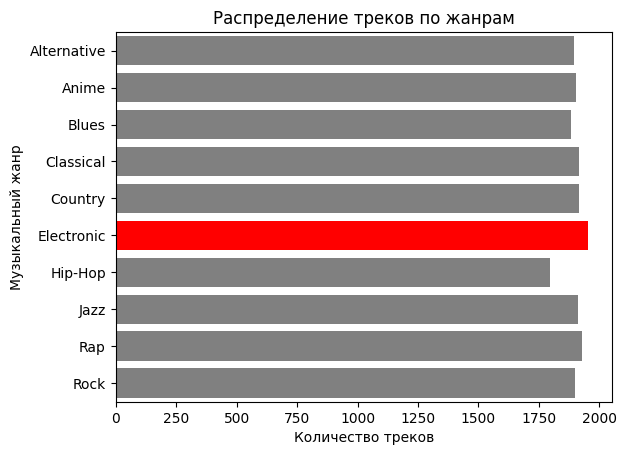

In [ ]:
# считаем количество треков в каждом жанре и находим самый популярный
genre_counts = genres_full.groupby("music_genre")["instance_id"].count().reset_index(name="counts")
most_popular_genre = genre_counts.sort_values("counts", ascending=False).iloc[0]["music_genre"]

# столбиковая диаграмма
genre_plot = sns.barplot(x="counts", y="music_genre", data=genre_counts)
genre_plot.set_title("Распределение треков по жанрам")
genre_plot.set_xlabel("Количество треков")
genre_plot.set_ylabel("Музыкальный жанр")
most_popular_genre_idx = genre_counts[genre_counts["music_genre"] == most_popular_genre].index[0]
for i, _ in enumerate(genre_plot.patches):
  genre_plot.patches[i].set_facecolor("gray")
genre_plot.patches[most_popular_genre_idx].set_facecolor("red")
plt.show()

In [ ]:
# ищем самый танцевальный жанр
genre_avg_dnc = genres_full.groupby("music_genre") \
["danceability"].mean().reset_index(name="avg_danceability").sort_values("avg_danceability", ascending=False)
max_avg_dnc_genre = genre_avg_dnc.iloc[0]["music_genre"]
print(f'Самый танцевальный музыкальный жанр - {max_avg_dnc_genre}. \
Его средняя танцевальность равна {round(genre_avg_dnc.iloc[0]["avg_danceability"], 3)}.')

Самый танцевальный музыкальный жанр - Hip-Hop. Его средняя танцевальность равна 0.718.


In [ ]:
# ищем тональности для жанров
mode_share = pd.DataFrame(genres_full.groupby(['music_genre', 'mode']).size().unstack())

mode_share['the_most_popular_mode'] = np.zeros(mode_share.shape[0])
for ind in mode_share.index:
  if mode_share['Major'][ind] > mode_share['Minor'][ind]:
    mode_share.at[ind, 'the_most_popular_mode'] = 'major'
  elif mode_share['Minor'][ind] > mode_share['Minor'][ind]:
    mode_share.at[ind, 'the_most_popular_mode'] = 'minor'
  else:
    mode_share.at[ind, 'the_most_popular_mode'] = 'equally'

mode_share

mode,Major,Minor,the_most_popular_mode
music_genre,,,
Alternative,1197,697,major
Anime,1175,729,major
Blues,1330,554,major
Classical,1299,616,major
Country,1653,263,major
Electronic,1044,909,major
Hip-Hop,982,812,major
Jazz,986,925,major
Rap,1066,862,major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [ ]:
# ищем исполнителей, у которых больше и меньше всего треков
most_tracks_artist = genres_full.groupby("artist_name")["instance_id"].count().idxmax()
print(f'Исполнитель с наибольшим количеством треков: {most_tracks_artist}')
least_tracks_artist = genres_full.groupby("artist_name")["instance_id"].count().idxmin()
print(f'Исполнитель с наименьшим количеством треков: {least_tracks_artist}')

Исполнитель с наибольшим количеством треков: Nobuo Uematsu
Исполнитель с наименьшим количеством треков: $NOT


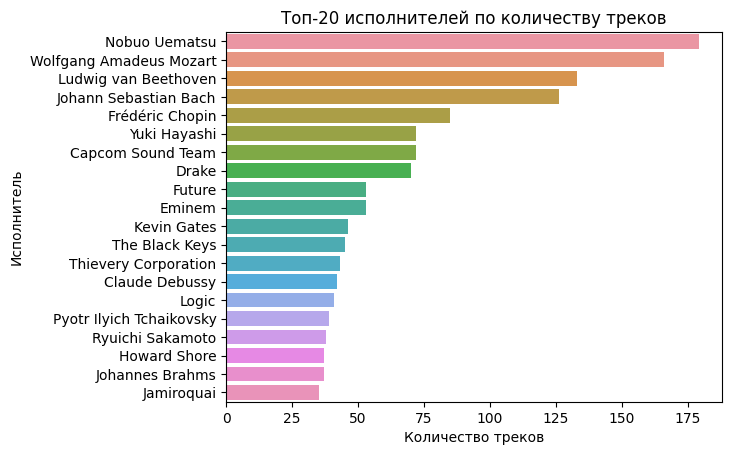

In [ ]:
# столбиковая диаграмма
top_artists = genres_full.groupby('artist_name') \
['instance_id'].count().sort_values(ascending=False)[:20].reset_index(name="counts")
artist_plot = sns.barplot(x="counts", y="artist_name", data=top_artists)
artist_plot.set_title("Топ-20 исполнителей по количеству треков")
artist_plot.set_xlabel("Количество треков")
artist_plot.set_ylabel("Исполнитель")
plt.show()

**Вывод:**

Наибольшее количество треков в моём датасете у Nobuo Uematsu - японского исполнителя, пишущего в жанре Anime, в топе есть ещё несколько представителей этого жанра. Можно предположить, что датасет собран японскими специалистами.

Также лидирующие места по количеству треков занимают известные мировые композиторы (их музыка в жанре Classical). Это ожидаемо, так как за свою жизнь каждый из них написал очень много треков, больше, чем многие современные исполнители.

В топе, помимо вышеописанного, встретились несколько очень популярных хип-хоп артистов.

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

<Axes: >

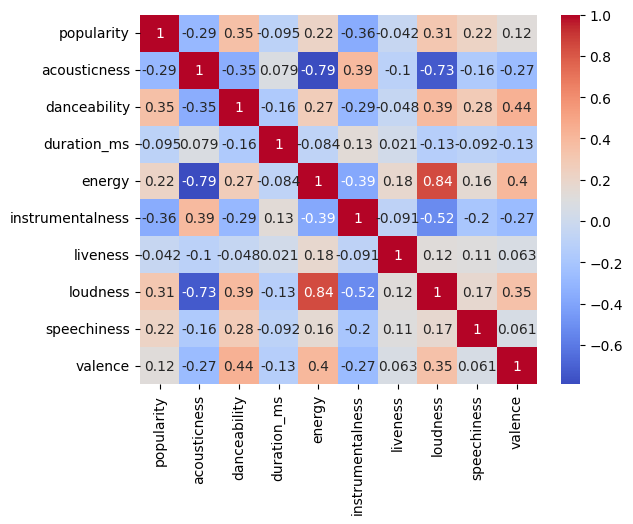

In [ ]:
# корреляционная матрица для характеристик
cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
        'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
corr = genres_full[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Вывод:**

Наиболее сильная положительная корреляция наблюдается между показателями "danceability" (танцевальность) и "valence" (настроение). Это может означать, что более танцевальные треки имеют более высокое настроение, что делает их более привлекательными для аудитории.

Также стоит отметить сильную отрицательную корреляцию между показателями "acousticness" (акустичность) и "energy" (энергичность), что может свидетельствовать о том, что акустические треки чаще менее энергичны.

Показатель "popularity" (популярность) имеет относительно низкую корреляцию с другими показателями, что может указывать на то, что успешность трека зависит от множества факторов, а не только от его характеристик.

Также следует отметить отрицательную корреляцию между "instrumentalness" (инструментальность) и "danceability" (танцевальность), что может свидетельствовать о том, что более инструментальные треки могут быть менее танцевальными.

В целом, корреляционная матрица позволяет лучше понять взаимосвязи между различными характеристиками треков и может быть полезна для дальнейшего анализа.

In [ ]:
# корреляция между длиной и популярностью
correlation = genres_full['popularity'].corr(genres_full['track_name'].str.len())
print(f'Корреляция между популярностью и длиной названия трека: {correlation}')

Корреляция между популярностью и длиной названия трека: -0.22760798725145828


**Вывод:**

Отрицательный знак коэффициента указывает на то, что более длинные названия треков склонны иметь немного меньшую популярность. Однако, следует отметить, что коэффициент корреляции довольно низкий, что означает, что связь между длиной названия и популярностью не является сильной или однозначной.

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

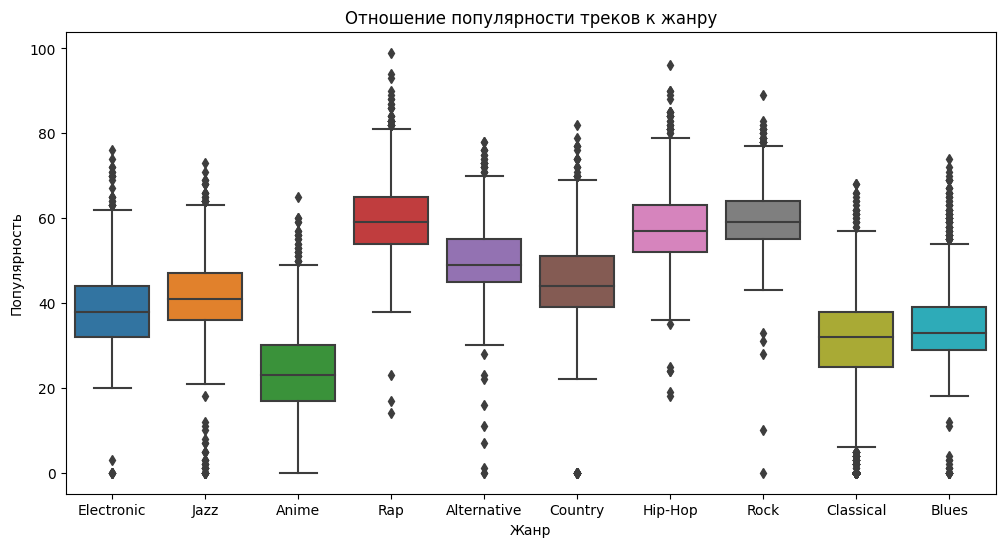

In [ ]:
# ящиковая диаграмма
plt.figure(figsize=(12, 6))
sns.boxplot(x='music_genre', y='popularity', data=genres_full)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.title('Отношение популярности треков к жанру')
plt.show()


**Вывод:**

Жанры "Hip-Hop", "Rap" и "Rock" имеют наибольшую среднюю популярность треков. Эти жанры, как правило, наиболее востребованные в современном мире. "Hip-Hop" и "Rap" почти не отличаются по популярности, потому что это очень похожие друг на друга жанры, и любители одного из них часто слушают и другой.

Жанры "Alternative", "Blues", "Classical", "Country", "Electronic" и "Jazz" имеют среднюю популярность треков. Эти жанры не такие востребованные, их обычно предпочитают "ценители" какой-то определённой музыки, она не особенно подходит для вечеринок и хит-парадов по радио.

Жанр "Anime" имеет наименьшую среднюю популярность треков. Этот жанр более узкоспециализированный и имеет свою специфическую аудиторию, состоящую из любителей японской анимации.

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

In [ ]:
# ищем топ-3 жанра
genres_grouped = genres_full.groupby(['music_genre', 'artist_name'], as_index=False)['popularity'].mean()
genres_top_3 = genres_grouped.groupby('music_genre')['popularity'].sum().sort_values(ascending=False).iloc[:3]
genres_top_3 = genres_top_3.index.tolist()
genres_top_3

['Rock', 'Alternative', 'Rap']

In [ ]:
# ищем самого популярного исполнителя в каждом из топ-3 жанров
artist_by_genre = []
for genre in genres_top_3:
    artist_top = genres_grouped[genres_grouped['music_genre'] == genre].sort_values('popularity', ascending=False)
    artist_by_genre.append(artist_top.iloc[0]['artist_name'])

genres_and_artists = genres_full[genres_full['music_genre'].isin(genres_top_3) & genres_full['artist_name'].isin(artist_by_genre)]
genres_grouped = genres_and_artists.groupby(['music_genre', 'artist_name'], as_index=False)['popularity'].count()
genres_grouped

,music_genre,artist_name,popularity
0,Alternative,ChocQuibTown,1
1,Alternative,Smash Mouth,2
2,Rap,Famous Dex,1
3,Rock,Smash Mouth,1


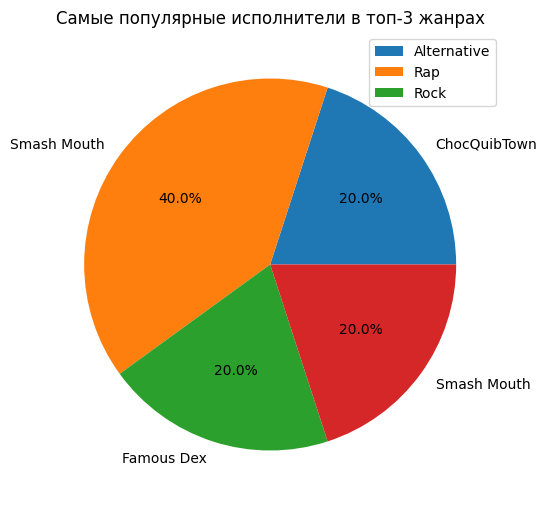

In [ ]:
# строим круговую диаграмму
fig, ax = plt.subplots(figsize=(6, 10))

ax.pie(genres_grouped['popularity'], labels=genres_grouped['artist_name'], autopct='%1.1f%%')

ax.legend(np.unique(genres_grouped['music_genre'].values), loc=1)
ax.set_title('Самые популярные исполнители в топ-3 жанрах')

plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
# ищем самый популярный и самый непопулярный жанр и считаем значения
most_popular_genre = genres_full.groupby(['music_genre'])['popularity'].mean().idxmax()
least_popular_genre = genres_full.groupby(['music_genre'])['popularity'].mean().idxmin()

most_stat = genres_full[genres_full['music_genre'] == most_popular_genre].mean(numeric_only=True).drop(['instance_id', 'duration_ms'])
least_stat = genres_full[genres_full['music_genre'] == least_popular_genre].mean(numeric_only=True).drop(['instance_id', 'duration_ms'])

print(f'Самый популярный жанр - {most_popular_genre}, самый непопулярный - {least_popular_genre}')

Самый популярный жанр - Rap, самый непопулярный - Anime


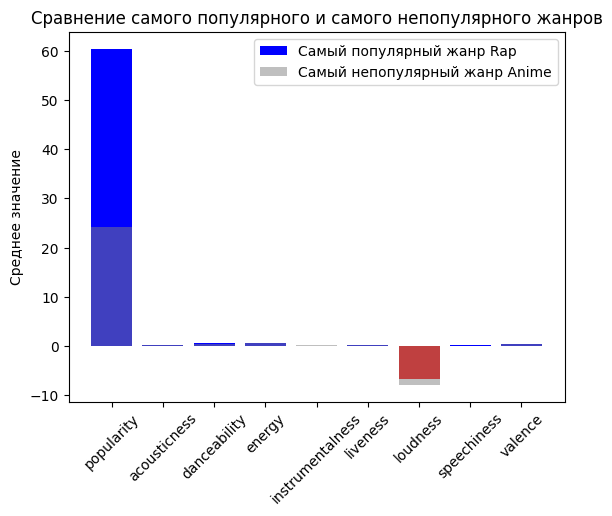

In [ ]:
# столбиковая диаграмма
fig, ax = plt.subplots()
colors = ['red' if x < 0 else 'blue' for x in most_stat]
ax.bar(most_stat.index, most_stat.values, color=colors)
ax.bar(least_stat.index, least_stat.values, color='gray', alpha=0.5)

ax.set_title('Сравнение самого популярного и самого непопулярного жанров')
ax.set_ylabel('Среднее значение')
ax.legend([f'Самый популярный жанр {most_popular_genre}', f'Самый непопулярный жанр {least_popular_genre}'])
plt.xticks(rotation=45)

plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
# добавляем столбец с длительностью
genres_duration = genres_full.copy()
genres_duration['длительность_трека'] = np.zeros(genres_full.shape[0])

genres_duration

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
3653,44110.0,Pendulum,Blood Sugar - Original Mix,53.0,0.000139,0.366,315733.0,0.97000,0.808000,G#,0.1680,-5.109,Major,0.1270,176.00400000000002,4-Apr,0.1700,Electronic,0.0
14031,51469.0,"Harry Connick, Jr.",The Way You Look Tonight,33.0,0.547000,0.457,225573.0,0.23000,0.000000,C#,0.2660,-13.699,Major,0.0377,130.102,4-Apr,0.5210,Jazz,0.0
5515,82487.0,Nobuo Uematsu,"Primal Judgment (From ""Final Fantasy XIV"")",29.0,0.377000,0.308,310893.0,0.73200,0.904000,F,0.1760,-8.069,Major,0.0469,75.195,4-Apr,0.2410,Anime,0.0
2905,31349.0,The Chemical Brothers,Do It Again,50.0,0.022400,0.867,332973.0,0.71400,0.704000,E,0.1040,-5.144,Major,0.0662,123.97399999999999,4-Apr,0.6230,Electronic,0.0
26451,71898.0,Dave East,Phone Jumpin,60.0,0.021600,0.632,247227.0,0.76700,0.000000,A,0.3780,-4.002,Minor,0.2320,140.14,4-Apr,0.6220,Rap,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39040,59347.0,Pink Floyd,Dogs,60.0,0.076200,0.321,-1.0,0.47900,0.004710,D,0.1510,-11.395,Minor,0.0490,109.23899999999999,4-Apr,0.1390,Rock,0.0
23569,43039.0,Wayne Hancock,Thunderstorms and Neon Signs,37.0,0.618000,0.603,222467.0,0.29300,0.000001,E,0.1090,-12.984,Major,0.0312,135.16899999999998,4-Apr,0.5560,Country,0.0
44768,36771.0,Elena Kats-Chernin,Lullaby For Nick,49.0,0.989000,0.388,-1.0,0.00484,0.881000,A,0.0588,-32.450,Minor,0.0416,?,3-Apr,0.0689,Classical,0.0
9792,24634.0,いとうかなこ,はじまりの歌,19.0,0.017800,0.413,276587.0,0.58700,0.016000,A#,0.0786,-8.292,Major,0.0351,95.95299999999999,4-Apr,0.2520,Anime,0.0


In [ ]:
for i in range(genres_duration.shape[0]):
  time = genres_duration['duration_ms'].iloc[i]
  if time <= 180000:
    genres_duration.at[i, 'длительность_трека'] = 'короткая'
  elif 180000 < time <= 300000:
    genres_duration.at[i, 'длительность_трека'] = 'средняя'
  else:
    genres_duration.at[i, 'длительность_трека'] = 'длинная'

indexes_to_remove = genres_duration.loc[pd.isnull(genres_duration["artist_name"])].index
genres_duration = genres_duration.drop(index=indexes_to_remove)

genres_duration

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
3653,44110.0,Pendulum,Blood Sugar - Original Mix,53.0,0.000139,0.366,315733.0,0.970,0.808000,G#,0.1680,-5.109,Major,0.1270,176.00400000000002,4-Apr,0.170,Electronic,средняя
14031,51469.0,"Harry Connick, Jr.",The Way You Look Tonight,33.0,0.547000,0.457,225573.0,0.230,0.000000,C#,0.2660,-13.699,Major,0.0377,130.102,4-Apr,0.521,Jazz,длинная
5515,82487.0,Nobuo Uematsu,"Primal Judgment (From ""Final Fantasy XIV"")",29.0,0.377000,0.308,310893.0,0.732,0.904000,F,0.1760,-8.069,Major,0.0469,75.195,4-Apr,0.241,Anime,средняя
2905,31349.0,The Chemical Brothers,Do It Again,50.0,0.022400,0.867,332973.0,0.714,0.704000,E,0.1040,-5.144,Major,0.0662,123.97399999999999,4-Apr,0.623,Electronic,длинная
26451,71898.0,Dave East,Phone Jumpin,60.0,0.021600,0.632,247227.0,0.767,0.000000,A,0.3780,-4.002,Minor,0.2320,140.14,4-Apr,0.622,Rap,длинная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,82129.0,Young the Giant,Simplify,56.0,0.001230,0.456,212213.0,0.860,0.000000,E,0.1540,-3.444,Major,0.0403,99.15899999999999,4-Apr,0.387,Alternative,длинная
15827,87888.0,Robert DeLong,First Person on Earth,52.0,0.228000,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.98,4-Apr,0.344,Alternative,длинная
23569,43039.0,Wayne Hancock,Thunderstorms and Neon Signs,37.0,0.618000,0.603,222467.0,0.293,0.000001,E,0.1090,-12.984,Major,0.0312,135.16899999999998,4-Apr,0.556,Country,длинная
9792,24634.0,いとうかなこ,はじまりの歌,19.0,0.017800,0.413,276587.0,0.587,0.016000,A#,0.0786,-8.292,Major,0.0351,95.95299999999999,4-Apr,0.252,Anime,средняя


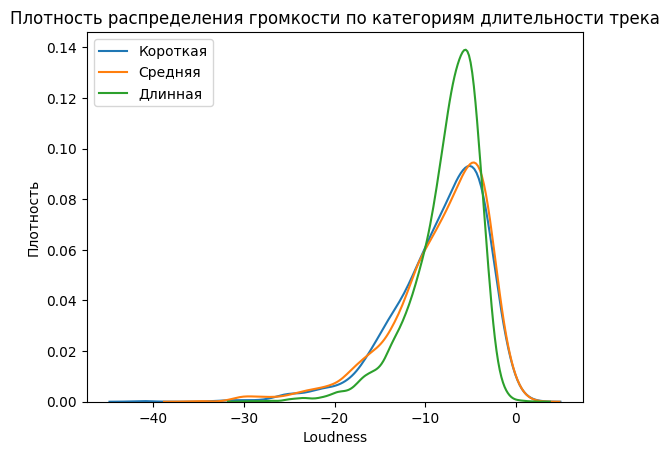

In [ ]:
# график распределения громкости по длительности
import seaborn as sns

short = genres_duration[genres_duration['длительность_трека'] == 'короткая']
medium = genres_duration[genres_duration['длительность_трека'] == 'средняя']
lng = genres_duration[genres_duration['длительность_трека'] == 'длинная']


sns.kdeplot(short['loudness'], label='Короткая')
sns.kdeplot(medium['loudness'], label='Средняя')
sns.kdeplot(lng['loudness'], label='Длинная')

plt.title('Плотность распределения громкости по категориям длительности трека')
plt.xlabel('Loudness')
plt.ylabel('Плотность')


plt.legend()
plt.show()

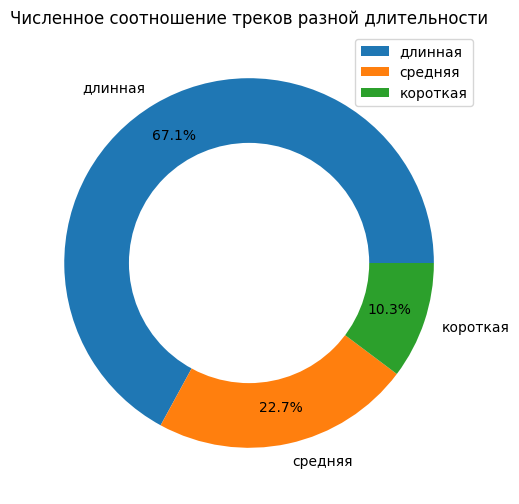

In [ ]:
# круговая диаграмма
tracks = genres_duration['длительность_трека'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(tracks, labels=tracks.index, autopct='%1.1f%%', pctdistance=0.80)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

ax.legend(loc=1)
ax.set_title('Численное соотношение треков разной длительности')

plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]